*****************************************************************
#  K-means model
- Group Members: Behnam Bozorgi, Ramon Cremers, Sunny Soni
*****************************************************************

In [1]:
import platform
import sys
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import functions.preprocessing as prep

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


print("This jupyter notebook is running on Python " + platform.python_version())
# It's good practice to assert packages requirements at the beginning of a script:
assert sys.version_info >= (3, 6)  # Tested with Python==3.7.9

This jupyter notebook is running on Python 3.7.9


In [2]:
training_set_file_path = 'data/training_set_VU_DM.csv'
test_set_file_path = 'data/test_set_VU_DM.csv'
training_data = pd.read_csv(training_set_file_path)
test_data = pd.read_csv(test_set_file_path)

In [4]:
training_data = prep.parseDateTime(training_data)
training_data, useless_columns = prep.removeUselessColumns(training_data, threshold=90)
training_data = prep.replaceNaN(training_data)
training_data = prep.mergeComps(training_data)
training_data.info(verbose=True)

KeyError: 'date_time'

In [11]:
training_data.com

16.897279678086264

We seperate the X (features) from the Y (targets). We apply scaling to the features to avoid problems. We also use PCA to reduce the dimensionality of our featureset while not losing too much data.

In [35]:
training_data_y = training_data.booking_bool
training_data_x = training_data.drop(['booking_bool'],1)
#training_data_y = training_data.click_bool
#training_data_x = training_data.drop(['click_bool'],1)

scaler = StandardScaler().fit(training_data_x)
training_data_x = scaler.transform(training_data_x)

pca = PCA(n_components=15)
principalComponents = pca.fit_transform(training_data_x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca 1', 'pca 2', 'pca 3', 'pca 4', 'pca 5', 'pca 6', 'pca 7', 'pca 8', 'pca 9', 'pca 10', 'pca 11', 'pca 12', 'pca 13', 'pca 14', 'pca 15'])

#training_data_x, testing_data_x, training_data_y, testing_data_y = train_test_split(training_data_x, training_data_y, test_size=0.25, random_state=42)
training_data_x, testing_data_x, training_data_y, testing_data_y = train_test_split(principalDf, training_data_y, test_size=0.25, random_state=42)

del training_data

c:\Users\Ramon\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


We set K=2 because this is a binary classification problem (idk if this is correct)

In [36]:
model = KMeans(n_clusters = 2, init ='k-means++')
model.fit(training_data_x, training_data_y)

KMeans(n_clusters=2)

In [37]:
y_preds = model.predict(testing_data_x)
tn, fp, fn, tp = confusion_matrix(testing_data_y, y_preds).ravel()
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)

In [38]:
report = classification_report(testing_data_y, y_preds, output_dict=True)
temp = pd.DataFrame(report).transpose()
temp.to_csv('KMeans-15-booking_bool.csv')

Some legacy code below

In [17]:
#wcs = []
#for i in range(6,46):
#    model = KMeans(n_clusters = i, init = 'k-means++')
#    model.fit(training_data_x)
#    wcs.append(model.inertia_)
#print(wcs)

correct = 0
incorrect = 0
temp = model.predict(training_data_x)
for x, y in zip(temp, training_data_y):
    if x == y:
        correct += 1
    else: 
        incorrect += 1
print(f'The amount correct is: {correct}\nThe amount incorrect is: {incorrect}')

The amount correct is: 2691020
The amount incorrect is: 2267327


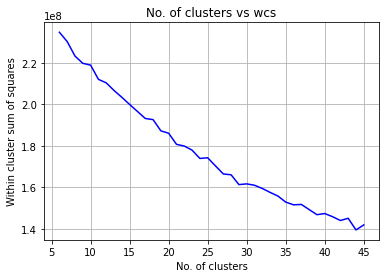

In [9]:
plt.plot(range(6,46), wcs, color='b')
plt.title('No. of clusters vs wcs')
plt.xlabel('No. of clusters')
plt.ylabel('Within cluster sum of squares')
#plt.annotate('Elbow', xytext=(2.5,240000000), xy=(3,250000000), arrowprops={'facecolor':'green'})
plt.grid()
plt.savefig('cluster sizes vs wcs.png')
plt.show()


In [26]:
clustering = KMeans(n_clusters=5, random_state=5)
clustering.fit(training_data_x[training_data_y])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [16]:
temp = clustering.predict(training_data_x[training_data_y])

In [17]:
print(np.unique(temp))
print(np.unique(training_data_y))

[0 2]
[0 1]


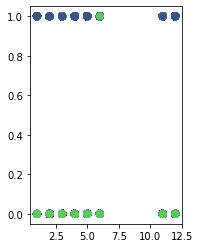

In [92]:
plt.subplot(1,2,1)
plt.scatter(x=training_data_x.month, y=training_data_y, s=50, c=[clustering.labels_])

1.0


c:\Users\Ramon\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """
c:\Users\Ramon\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0.92, 'K Means')

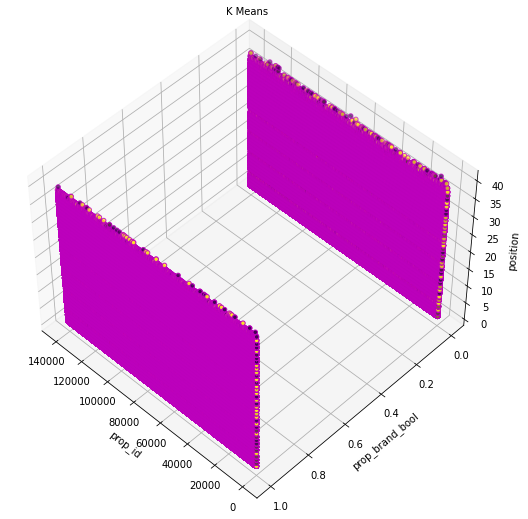

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (7, 7))

ax = Axes3D(fig, rect = [0, 0, 0.95, 1], 
            elev = 48, azim = 134)

ax.scatter(training_data.iloc[:, 4:5],
           training_data.iloc[:, 7:8], 
           training_data.iloc[:, 11:12],
           c = kmeans[0].labels_.astype(np.float), edgecolor = 'm')

ax.set_xlabel('prop_id')
ax.set_ylabel('prop_brand_bool')
ax.set_zlabel('position')

plt.title('K Means', fontsize = 10)